# Step 1: Import the modules that will do all the work

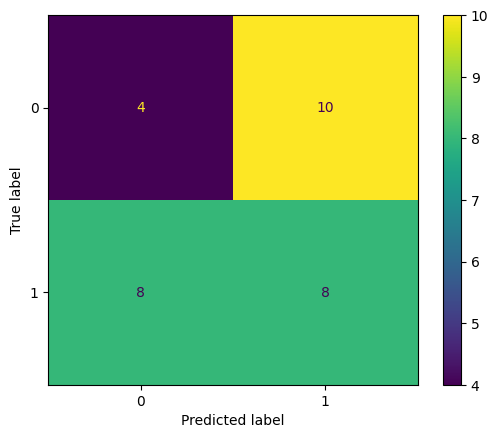

In [2]:
import pandas as pd  # load and manipulate data and for One-Hot Encoding
import numpy as np  # calculate the mean and standard deviation
import matplotlib.pyplot as plt  # drawing graphs
from sklearn.tree import DecisionTreeClassifier  # a classification tree
from sklearn.tree import plot_tree  # draw a classification tree
from sklearn.model_selection import train_test_split  # split data into training and testing sets
from sklearn.model_selection import cross_val_score  # cross-validation
from sklearn.metrics import confusion_matrix  # creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay  # for drawing a confusion matrix

# Sample data (replace with actual data)
X = np.random.rand(100, 5)  # Replace with actual feature data
y = np.random.randint(0, 2, 100)  # Replace with actual target data

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Generate predictions
y_pred = clf.predict(X_test)

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()


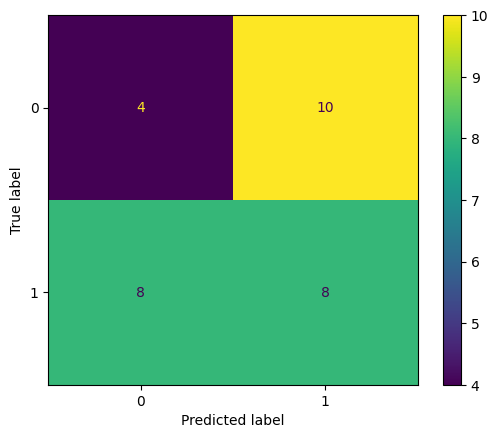

In [3]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Step 2: Import the data

In [4]:
dataset = pd.read_csv('Heart_disease_prediction.csv' , header = None)

In [5]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
dataset.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
dataset.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Step 3: Missing Data Part 1: Identifying Missing Data

In [7]:
dataset.dtypes

,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [8]:
dataset['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
dataset['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# Step 4: Missing Data Part 2: Dealing With Missing Data

In [10]:
len(dataset.loc[(dataset['ca'] == '?')
                |
                (dataset['thal'] == '?')])

6

In [11]:
dataset.loc[(dataset['ca'] == '?')
                |
                (dataset['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
len(dataset)

303

In [13]:
df_no_missing = dataset.loc[(dataset['ca'] != '?')
                &
                (dataset['thal'] != '?')]

In [14]:
len(df_no_missing)

297

In [15]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [16]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

# Step 5: Format Data Part 1: Split the Data into Dependent and Independent Variables

In [17]:
X = df_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [18]:
y = df_no_missing['hd'].copy()
y.head()

,hd
0,0
1,2
2,1
3,0
4,0


# Step 6: Format the Data Part 2: One-Hot Encoding

In [19]:
X.dtypes

,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [20]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [21]:
pd.get_dummies(X , columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [22]:
X_encoded = pd.get_dummies(X , columns=[ 'cp' , 'restecg', 'slope', 'thal' , 'oldpeak'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,ca,cp_1.0,cp_2.0,...,oldpeak_3.2,oldpeak_3.4,oldpeak_3.5,oldpeak_3.6,oldpeak_3.8,oldpeak_4.0,oldpeak_4.2,oldpeak_4.4,oldpeak_5.6,oldpeak_6.2
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,0.0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,3.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,0.0,False,False,...,False,False,True,False,False,False,False,False,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,0.0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [23]:
y.unique()

array([0, 2, 1, 3, 4])

In [24]:
y_not_zero_index = y>0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

# Step 7 : Build A Preliminary Classification Tree

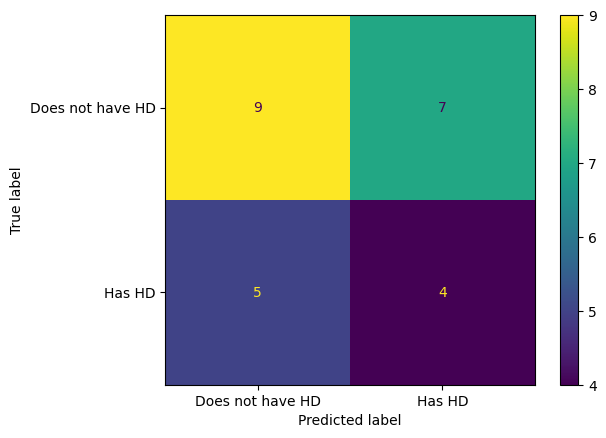

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Sample data (replace with actual data)
X = np.random.rand(100, 5)  # Replace with actual feature data
y = np.random.randint(0, 2, 100)  # Replace with actual target data

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and fit Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])
plt.show()


In [29]:
# plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

# Step 8: Cost Complexity Pruning Part 1: Visualize alpha

In [30]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#     print(clf_dt)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

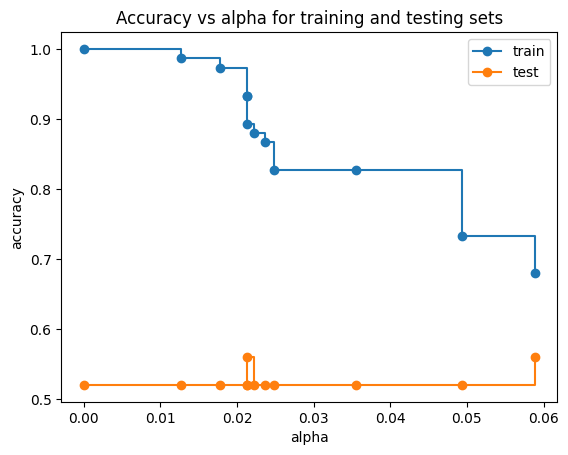

In [31]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Step 9: Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

<Axes: xlabel='tree'>

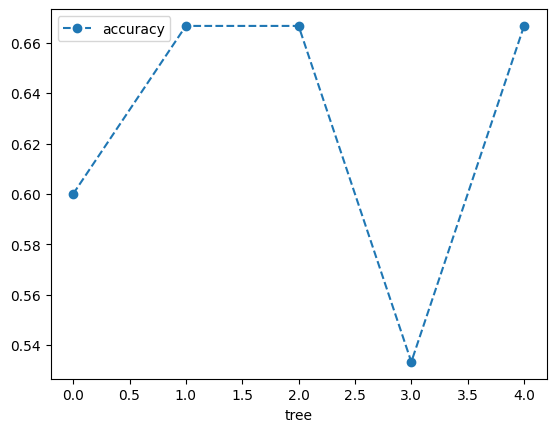

In [32]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
dataset = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

dataset.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

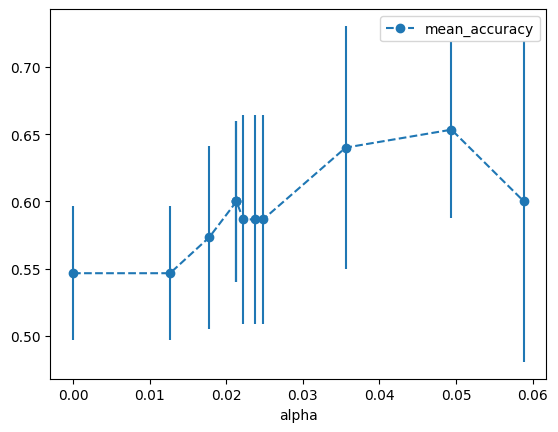

In [33]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [34]:
alpha_results [(alpha_results['alpha'] > 0.014)
              &
              (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std


In [35]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
                               &
                               (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

,alpha


In [38]:
if not ideal_ccp_alpha.empty:
    ideal_ccp_alpha = float(ideal_ccp_alpha.iloc[0])
else:
    print("ideal_ccp_alpha is empty.")



ideal_ccp_alpha is empty.


# Step 10: Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

In [40]:
if ideal_ccp_alpha.empty:
    ideal_ccp_alpha = 0.0  # or another reasonable default
else:
    ideal_ccp_alpha = float(ideal_ccp_alpha.iloc[0])  # Access the first element
ideal_ccp_alpha = 0.01  # Choose an appropriate test value


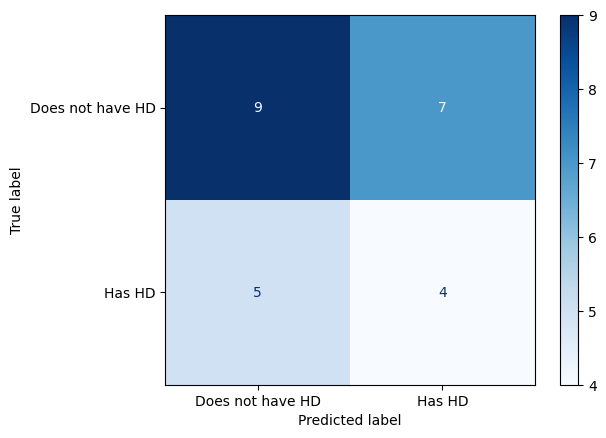

In [43]:
# Set a value for ideal_ccp_alpha if not already done
ideal_ccp_alpha = 0.01  # Adjust if you have a specific value

clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_train, y_train)  # Ensure it is fitted to the training data
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf_dt_pruned,
    X_test,
    y_test,
    display_labels=["Does not have HD", "Has HD"],
    cmap='Blues'
)
plt.show()


X has 5 columns.


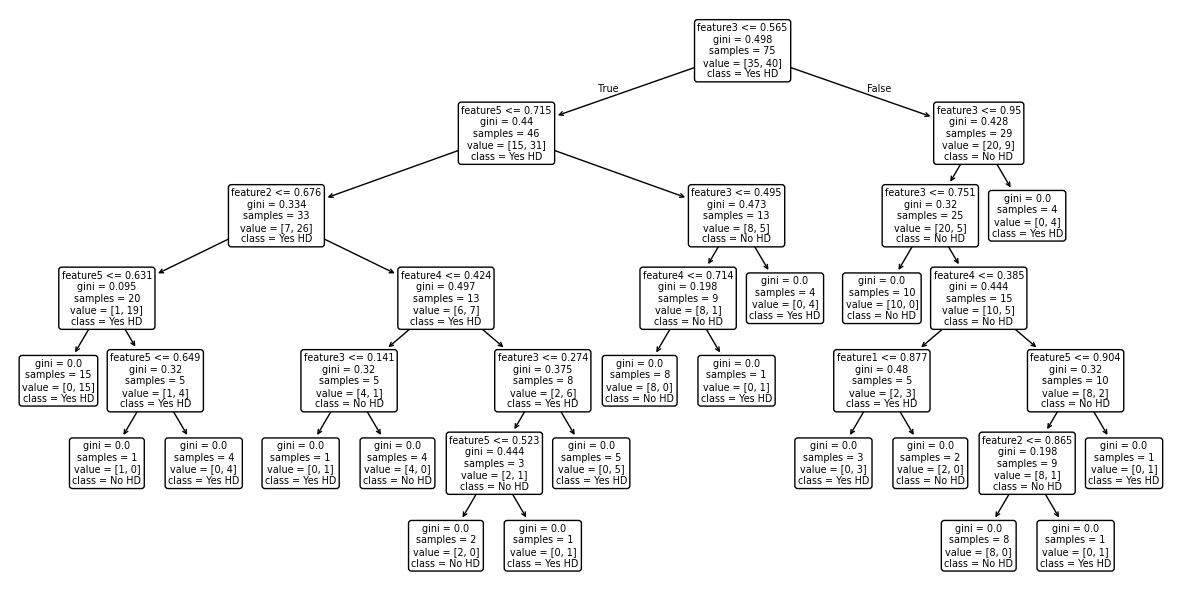

In [46]:
# Verify the number of columns in X
num_columns = X.shape[1]
print(f"X has {num_columns} columns.")

# Ensure feature_names has the same number of elements
feature_names = ["feature1", "feature2", "feature3", "feature4", "feature5"]  # Update accordingly

# Convert X to a DataFrame with the correct feature names
X_df = pd.DataFrame(X, columns=feature_names)

# Plot the decision tree
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_df.columns)
plt.show()
